<a href="https://colab.research.google.com/github/AnjaKoller1996/DeepRL/blob/master/ABM_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this is our imports and stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1: Gini Index

**N**: number of agents, uniquely defined by wealth. Each agent i has wealth w_i

**Gini index**: measure for inequality G_w = (sum for i,j to N |w_i-w_j|)/2N* sum w_i
**G=0** means egalitarian distribution and **G=1** means completely unequal distribution


In [ ]:
def calculate_gini_index(wealths):
  return sum([abs(w1-w2) for w1 in wealths for w2 in wealths]) / (2 * len(wealths) * sum(wealths))

Basic Experiments on Gini Index:
First we see that when all wealths are equally distributed (i.e. w_i = 1 for all i) the Gini-index is zero as wealth is distributed equally. When we have a complete unequal distribution, i.e. that only one has all the wealth and the rest has nothing the Gini-index is 1 as the wealth is distributed completely unequal. The more unequal the distribution is the nearer the Gini-index is to 1. I.e. if only a few people have all the wealth the Gini-index is close to one and if all people have nearly the same wealth the Gini-index is close to 0.

In [ ]:
x = np.ones(1000) #gini index should be 0
calculate_gini_index(x)

0.0

In [ ]:
x = np.random.rand(1000)*10000 #should be deviation, so gini index is not 0
calculate_gini_index(x)

0.341624327594142

In [ ]:
x = np.concatenate((np.zeros(1000), np.ones(1000)))
calculate_gini_index(x) #gini index should be 0.5

0.5

In [ ]:
x = np.concatenate((np.zeros(1000), np.ones(5000)))
calculate_gini_index(x) #gini index should be not 0, inbalanced weights

0.16666666666666666

# Exercise 2: Agents Simulation

Establish actions and add to a list

In [ ]:
alpha = 0.1 # to control mico-level properties

In [ ]:
def random_add(x, y):
  if (np.random.rand(1) * 50 % 2) == 0:
    return x-1, y+1
  else:
    return x+1, y-1

In [ ]:
def greedy_add(x, y):
  if x >= y:
    return x+1, y-1
  else:
    return x-1, y+1

In [ ]:
def random_mull_add(x, y):
  if (np.random.rand(1) * 50 % 2) == 0:
    return  x-(x*alpha), y+(alpha*x)
  else:
    return x+(y*alpha), y-(alpha*y)

In [ ]:
def greedy_mull_add(x, y):
  if x >= y:
    return x+(y*alpha), y-(alpha*y)
  else:
    return x-(x*alpha), y+(alpha*x)

In [ ]:
actions = [random_add, greedy_add, random_mull_add, greedy_mull_add]

# Description and Explanation:
We check that if the wealth of an agent is equal to 0 nothing happens, in order to not have negative wealth. If we wouldn't check this the wealth of one agent would get negative. 
**Convergence**: when and under what circumstances does the wealth inequality (i.e. the Gini-index) not change remarkably anymore, i.e. we reach the stationary state of wealth inequality?

**General Observation**: All start with equal wealth and thus gini index of 0. Then they get more and more inequal over time. All the algorithms bring more inequality. They differ in terms of speed of convergence and in fluctuation. 

**Observation Random Add:** TODO 

**Observation Greedy Add**: TODO

**Observation Random Mul Add**: TODO

**Observation Greedy Mul Add**: TODO

We check with N= 200, N = 10000 and with convergence

In [ ]:
def run_simulation_with_action(N, early_stop_patience, max_time_steps, action):
    wealths = np.ones(N) # initialised with 1
    highest_gini_index = -1
    early_stop_steps = 0
    current_gini = []
    current_gini.append(calculate_gini_index(wealths))
    for step in range(max_time_steps):
        for exchange in range(N):
            x_pos , y_pos = np.random.rand(2) * N
            x_pos = int(x_pos)
            y_pos = int(y_pos)
            if wealths[x_pos] != 0 and wealths[y_pos]!=0:
              wealths[int(x_pos)], wealths[int(y_pos)] = action(wealths[x_pos], wealths[y_pos])
        current_gini.append(calculate_gini_index(wealths))
        if current_gini[-1] > highest_gini_index:
            highest_gini_index = current_gini[-1]
            early_stop_steps = 0
        else:
            early_stop_steps += 1
            if early_stop_steps == early_stop_patience:
                current_gini = current_gini[:-early_stop_patience]
                break
    return current_gini

In [ ]:
N = 200
early_stop_patience = 5
gini_indices_200 = []
max_time_steps = 10000
for action in actions:
    gini_indices_200.append(run_simulation_with_action(N, early_stop_patience, max_time_steps, action))
    print("Action Done")

In [ ]:
gini_indices_200[0][-15:]

[0.812766497461929,
 0.8169796954314721,
 0.8149489795918368,
 0.8244387755102041,
 0.8288974358974359,
 0.8339175257731959,
 0.843659793814433,
 0.8446907216494846,
 0.8466580310880829,
 0.8495077720207254,
 0.8560362694300518,
 0.8582642487046632,
 0.8604922279792746,
 0.8605440414507772,
 0.8617875647668394]

In [ ]:
gini_indices_200[1][-15:]

[0.9563541666666666,
 0.9563541666666666,
 0.9563541666666666,
 0.9563541666666666,
 0.9567708333333333,
 0.9567708333333333,
 0.95703125,
 0.95703125,
 0.9571875,
 0.9571465968586388,
 0.9576842105263158,
 0.9576842105263158,
 0.9578421052631579,
 0.9578421052631579,
 0.9581578947368421]

In [ ]:
gini_indices_200[2][-15:]

[0.0,
 0.07697332585435915,
 0.10241559319394132,
 0.11571691345131574,
 0.13127239589906653,
 0.1463086469844626,
 0.1455708917009778,
 0.15791423506784255,
 0.16619473987327116,
 0.1733647559706786,
 0.17649185575036963,
 0.17759397638091812]

In [ ]:
gini_indices_200[3][-15:]

[0.9818441489529532,
 0.9822962666872332,
 0.9823283524002656,
 0.9823293325601714,
 0.9823299202668061,
 0.982481689228089,
 0.9824816917091449,
 0.9827332944227244,
 0.9827369242524826,
 0.9827456922137514,
 0.9829230908803588,
 0.9830549313379376,
 0.9830555536128905,
 0.9830721141619402,
 0.9830743929204381]

Plot the Gini indices


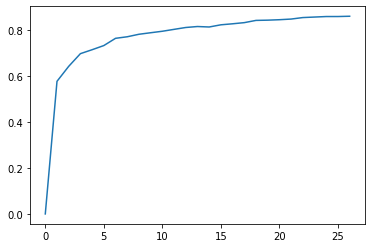

In [ ]:
plt.plot(gini_indices_200[0])

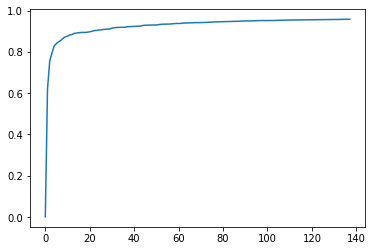

In [ ]:
plt.plot(gini_indices_200[1])

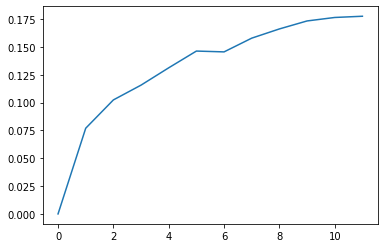

In [ ]:
plt.plot(gini_indices_200[2])

In [ ]:
plt.plot(gini_indices_200[3])

**Convergence**: In the following we find out the stationary wealth inequality, therefore we look when we reach convergence. 

In [ ]:
N = 10000
early_stop_patience = 5
gini_indices_10000 = []
max_time_steps = 10000
for action in actions:
    gini_indices_10000.append(run_simulation_with_action(N, early_stop_patience, max_time_steps, action))
    print("Action Done")

In [ ]:
gini_indices_10000[0][-15:]

In [ ]:
gini_indices_10000[1][-15:]

In [ ]:
gini_indices_10000[2][-15:]

In [ ]:
gini_indices_10000[3][-15:]

Plot the Gini indices


In [ ]:
plt.plot(gini_indices_10000[0])

In [ ]:
plt.plot(gini_indices_10000[1])

In [ ]:
plt.plot(gini_indices_10000[2])

In [ ]:
plt.plot(gini_indices_10000[3])